In [105]:
import pandas as pd
import numpy as np
from tableone import TableOne
#show more columns
pd.set_option('display.max_columns', None)

In [106]:
data = pd.read_csv('data/data_os_table1.csv', na_values=['nan'], index_col=0)

/home/kchen/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [107]:
data.head()

,FACILITY_TYPE_CD,FACILITY_LOCATION_CD,AGE,SEX,RACE,SPANISH_HISPANIC_ORIGIN,INSURANCE_STATUS,UR_CD_13,CROWFLY,CDCC_TOTAL_BEST,YEAR_OF_DIAGNOSIS,HISTOLOGY,GRADE,TUMOR_SIZE,LYMPH_VASCULAR_INVASION,RX_SUMM_SURG_PRIM_SITE,RX_SUMM_SURGICAL_MARGINS,SURG_DISCHARGE_DAYS,READM_HOSP_30_DAYS,REASON_FOR_NO_SURGERY,DX_RAD_STARTED_DAYS,RAD_ELAPSED_RX_DAYS,RX_SUMM_CHEMO,NO_HSD_QUAR_2016,MED_INC_QUAR_2016,PUF_MEDICAID_EXPN_CODE,TOTAL_DOSE,APR,stage,t_stage,n_stage,m_stage,p_stage,facs_quart_norm,3yr_mortality
PUF_CASE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D66f458f9-bdc0-4c95-94a3-a5f8c5bb74f9,3.0,5.0,52,2,1.0,0,0,2.0,3.6,0,2016,8070,2.0,38.0,0.0,0.0,8,NaN,0,1,86.0,NaN,3.0,1.0,1.0,0,0.0,0.0,2A,2.0,0.0,0,No surgery,3.0,0.0
Dfc68ea23-71aa-4b0d-87c0-587b4ce13d04,3.0,9.0,49,2,1.0,0,1,1.0,11.4,0,2004,8083,2.0,44.0,NaN,0.0,8,NaN,0,1,20.0,NaN,3.0,3.0,3.0,2,NaN,0.0,3A,2.0,1.0,0,No surgery,1.0,0.0
D54a1d0da-4328-4ca5-8481-87cd73b33dd4,3.0,6.0,58,1,1.0,0,2,1.0,14.0,0,2014,8070,2.0,86.0,0.0,27.0,7,0.0,0,0,35.0,58.0,3.0,4.0,4.0,2,5940.0,missing,2B,3.0,0.0,0,NaN,3.0,0.0
D62170955-5fc5-434e-8e6a-6a9e139851c4,3.0,6.0,80,2,1.0,0,3,1.0,NaN,0,2017,8070,3.0,25.0,9.0,22.0,0,NaN,0,0,34.0,39.0,3.0,NaN,NaN,2,5220.0,missing,1,1.0,0.0,0,NaN,3.0,0.0
Dbfa7903c-bd06-4e1c-9d22-a3d39ed96aee,4.0,4.0,42,2,1.0,0,1,1.0,12.7,0,2014,8070,3.0,20.0,0.0,27.0,1,0.0,0,0,45.0,44.0,3.0,4.0,4.0,1,NaN,missing,1,1.0,0.0,0,NaN,4.0,0.0


In [108]:
id_cols = ['PUF_CASE_ID', 'CLASS_OF_CASE', 'YEAR_OF_DIAGNOSIS']

fac_cols = [ 'PUF_FACILITY_ID', 'FACILITY_TYPE_CD', 'FACILITY_LOCATION_CD']

dem_cols = ['AGE',  'SEX', 'RACE', 'SPANISH_HISPANIC_ORIGIN']

ses_cols = ['INSURANCE_STATUS', 'UR_CD_13', 'CROWFLY', 'NO_HSD_QUAR_2016', 'MED_INC_QUAR_2016', 'PUF_MEDICAID_EXPN_CODE']

medco_cols = ['CDCC_TOTAL_BEST']

tumor_cols = ['HISTOLOGY', 'GRADE', 'TUMOR_SIZE', 'METS_AT_DX_LIVER', 'LYMPH_VASCULAR_INVASION',]

rad_cols = ['DX_RX_STARTED_DAYS', 'RAD_ELAPSED_RX_DAYS', 'REASON_FOR_NO_RADIATION', 'RAD_RX_DISC_EARLY','TOTAL_DOSE',]

surg_cols = ['DX_SURG_STARTED_DAYS', 'RX_SUMM_SURG_PRIM_SITE', 'RX_SUMM_SURGICAL_MARGINS','SURG_DISCHARGE_DAYS', 'READM_HOSP_30_DAYS', 'REASON_FOR_NO_SURGERY']

os_cols = ['DX_LASTCONTACT_DEATH_MONTHS', 'PUF_VITAL_STATUS',]

incl = id_cols + fac_cols + dem_cols + ses_cols + medco_cols + tumor_cols + rad_cols + surg_cols + os_cols

In [109]:
cols = data.columns.to_list()

not_cols = []
for x in incl:
    if x not in cols:
        not_cols.append(x)
not_cols

['PUF_CASE_ID',
 'CLASS_OF_CASE',
 'PUF_FACILITY_ID',
 'METS_AT_DX_LIVER',
 'DX_RX_STARTED_DAYS',
 'REASON_FOR_NO_RADIATION',
 'RAD_RX_DISC_EARLY',
 'DX_SURG_STARTED_DAYS',
 'DX_LASTCONTACT_DEATH_MONTHS',
 'PUF_VITAL_STATUS']

In [110]:
data.shape

(33834, 35)

In [111]:
cols = data.columns.to_list()

In [112]:
cols

['FACILITY_TYPE_CD',
 'FACILITY_LOCATION_CD',
 'AGE',
 'SEX',
 'RACE',
 'SPANISH_HISPANIC_ORIGIN',
 'INSURANCE_STATUS',
 'UR_CD_13',
 'CROWFLY',
 'CDCC_TOTAL_BEST',
 'YEAR_OF_DIAGNOSIS',
 'HISTOLOGY',
 'GRADE',
 'TUMOR_SIZE',
 'LYMPH_VASCULAR_INVASION',
 'RX_SUMM_SURG_PRIM_SITE',
 'RX_SUMM_SURGICAL_MARGINS',
 'SURG_DISCHARGE_DAYS',
 'READM_HOSP_30_DAYS',
 'REASON_FOR_NO_SURGERY',
 'DX_RAD_STARTED_DAYS',
 'RAD_ELAPSED_RX_DAYS',
 'RX_SUMM_CHEMO',
 'NO_HSD_QUAR_2016',
 'MED_INC_QUAR_2016',
 'PUF_MEDICAID_EXPN_CODE',
 'TOTAL_DOSE',
 'APR',
 'stage',
 't_stage',
 'n_stage',
 'm_stage',
 'p_stage',
 'facs_quart_norm',
 '3yr_mortality']

['FACILITY_TYPE_CD',
 'FACILITY_LOCATION_CD',
 'AGE',
 'SEX',
 'RACE',
 'SPANISH_HISPANIC_ORIGIN',
 'INSURANCE_STATUS',
 'UR_CD_13',
 'CROWFLY',
 'CDCC_TOTAL_BEST',
 'YEAR_OF_DIAGNOSIS',
 'HISTOLOGY',
 'BEHAVIOR',
 'GRADE',
 'TUMOR_SIZE',
 'LYMPH_VASCULAR_INVASION',
 'DX_RX_STARTED_DAYS',
 'DX_SURG_STARTED_DAYS',
 'RX_SUMM_SURGICAL_MARGINS',
 'SURG_DISCHARGE_DAYS',
 'READM_HOSP_30_DAYS',
 'REASON_FOR_NO_SURGERY',
 'RAD_ELAPSED_RX_DAYS',
 'NO_HSD_QUAR_2016',
 'MED_INC_QUAR_2016',
 'PUF_MEDICAID_EXPN_CODE',
 'RAD_RX_DISC_EARLY',
 'TOTAL_DOSE',
 'stage',
 'mstage',
 'facs_quart',
 'pstage',
 'tstage',
 'nstage',
 'APR',
 '3yr_mortality']

In [113]:
cols = data.columns.to_list()
num_cols = ['AGE', 'CROWFLY', 'TUMOR_SIZE', 'DX_RAD_STARTED_DAYS','DX_SURG_STARTED_DAYS','RAD_ELAPSED_RX_DAYS','SURG_DISCHARGE_DAYS','READM_HOSP_30_DAYS','TOTAL_DOSE',]
cat_cols = [x for x in cols if x not in num_cols]

In [114]:
#convert all values in cat_cols to strings except for NaN
for col in cat_cols:
    data[col] = data[col].astype(str)

data.loc[data['X'] == 'Y', 'X'] = 'Z'

data['X'].value_counts(dropna=False)

data.loc[data['X'] == 'None assigned', 'X'] = np.NaN
data['X'].fillna('Unknown', inplace=True)
data.loc[data['X'] == "Unknown", 'X'] = np.NaN
data['X'].value_counts(dropna=False)

In [115]:
data.drop(['RX_SUMM_SURG_PRIM_SITE', 'RAD_ELAPSED_RX_DAYS'], axis=1, inplace=True)

In [116]:
data.rename({'FACILITY_LOCATION_CD': 'Facility Location',
            'FACILITY_TYPE_CD': 'Facility Type',
            'AGE': 'Age',
            'SEX': 'Sex',
            'RACE': 'Race',
            'SPANISH_HISPANIC_ORIGIN': 'Hispanic Ethnicity',
            'INSURANCE_STATUS': 'Insurance Status',
            'UR_CD_13': 'Urban/Rural',
            'CROWFLY': 'Distance from Hospital',
            'CDCC_TOTAL_BEST': 'Charlson-Deyo Score',
            'YEAR_OF_DIAGNOSIS': 'Year of Diagnosis',
            'HISTOLOGY': 'Histology',
            'GRADE': 'Grade',
            'TUMOR_SIZE': 'Tumor Size',
            'LYMPH_VASCULAR_INVASION': 'Lymphovascular Invasion',
            'DX_RAD_STARTED_DAYS': 'Treatment Started, Days from Dx',
            'RX_SUMM_CHEMO': 'Chemotherapy',
            'DX_SURG_STARTED_DAYS': 'Surgery, Days from Dx',
            'RX_SUMM_SURGICAL_MARGINS': 'Surgical Margins',
            'SURG_DISCHARGE_DAYS': 'Post-op Length of Stay',
            'READM_HOSP_30_DAYS': 'Post-op Readmission',
            'REASON_FOR_NO_SURGERY': 'Reason for No Surgery',
            'RAD_ELAPSED_RX_DAYS': 'Duration of Radiation, Days',
            'NO_HSD_QUAR_2016': 'No High School Degree, Quartile',
            'MED_INC_QUAR_2016': 'Income, Quartile',
            'PUF_MEDICAID_EXPN_CODE': 'Medicaid Expansion',
            'RAD_RX_DISC_EARLY': 'Radiation Discontinued Early',
            'TOTAL_DOSE': 'Total Dose',
            'stage': 'Stage',
            'm_stage': 'M Stage',
            'facs_quart_norm': 'Facility Volume Quartile',
            'p_stage': 'Pathologic Stage',
            't_stage': 'T Stage',
            'n_stage': 'N Stage',
            'APR': 'APR performed',
            '3yr_mortality': '3-yr Mortality'}, axis=1, inplace=True)

In [117]:
cols = data.columns.to_list()
num_cols = ['Age', 'Distance from Hospital', 'Tumor Size', 'Treatment Started, Days from Dx', 'Surgery, Days from Dx', 'Post-op Length of Stay', 'Total Dose']
cat_cols = [x for x in cols if x not in num_cols]

#convert all values in cat_cols to strings except for NaN
for col in cat_cols:
    data[col] = data[col].astype(str)

In [118]:
data['Chemotherapy'].value_counts(dropna=False)

3.0     26951
2.0      3361
1.0      1491
0.0      1441
82.0      266
87.0      178
88.0       87
86.0       26
nan        22
85.0       11
Name: Chemotherapy, dtype: int64

In [119]:
data.loc[data['Chemotherapy'] == '3.0', 'Chemotherapy'] = 'Multi-agent'
data.loc[data['Chemotherapy'] == '2.0', 'Chemotherapy'] = 'Single-agent'
data.loc[data['Chemotherapy'] == '1.0', 'Chemotherapy'] = np.NaN
data.loc[data['Chemotherapy'] == '0.0', 'Chemotherapy'] = 'None'
data.loc[data['Chemotherapy'] == '88.0', 'Chemotherapy'] = np.NaN
data.loc[data['Chemotherapy'] == '82.0', 'Chemotherapy'] = 'None'
data.loc[data['Chemotherapy'] == '87.0', 'Chemotherapy'] = 'None'
data.loc[data['Chemotherapy'] == '86.0', 'Chemotherapy'] = 'None'
data = data[data['Chemotherapy'] != '85.0']
data['Chemotherapy'].value_counts(dropna=False)

Multi-agent     26951
Single-agent     3361
None             1911
NaN              1578
nan                22
Name: Chemotherapy, dtype: int64

In [120]:
data['Facility Location'].value_counts()

3.0    7332
4.0    5824
2.0    4728
9.0    4607
6.0    2536
5.0    2359
1.0    2073
7.0    1861
8.0    1519
nan     984
Name: Facility Location, dtype: int64

In [121]:
data.loc[data['Facility Location'] == '1.0', 'Facility Location'] = 'NE'
data.loc[data['Facility Location'] == '2.0', 'Facility Location'] = 'NE'
data.loc[data['Facility Location'] == '3.0', 'Facility Location'] = 'South'
data.loc[data['Facility Location'] == '4.0', 'Facility Location'] = 'Midwest'
data.loc[data['Facility Location'] == '5.0', 'Facility Location'] = 'Midwest'
data.loc[data['Facility Location'] == '6.0', 'Facility Location'] = 'Midwest'
data.loc[data['Facility Location'] == '7.0', 'Facility Location'] = 'South'
data.loc[data['Facility Location'] == '8.0', 'Facility Location'] = 'West'
data.loc[data['Facility Location'] == '9.0', 'Facility Location'] = 'West'


In [122]:
data.loc[data['Facility Location'] == 'None assigned', 'Facility Location'] = np.NaN
data['Facility Location'].fillna('Unknown', inplace=True)
data.loc[data['Facility Location'] == "Unknown", 'Facility Location'] = np.NaN
data['Facility Location'].value_counts(dropna=False)

Midwest    10719
South       9193
NE          6801
West        6126
nan          984
Name: Facility Location, dtype: int64

In [123]:
data['Sex'].value_counts()


2    23145
1    10678
Name: Sex, dtype: int64

In [124]:
data.loc[data['Sex'] == '1', 'Sex'] = 'Male'
data.loc[data['Sex'] == '2', 'Sex'] = 'Female'
data.loc[data['Sex'] == 'None assigned', 'Sex'] = np.NaN
data['Sex'].fillna('Unknown', inplace=True)
data.loc[data['Sex'] == "Unknown", 'Sex'] = np.NaN
data['Sex'].value_counts(dropna=False)

Female    23145
Male      10678
Name: Sex, dtype: int64

In [125]:
data['Race'].value_counts()

1.0     29620
2.0      3415
nan       237
98.0      203
3.0        91
96.0       52
5.0        36
4.0        32
15.0       29
8.0        29
6.0        27
7.0        16
10.0       14
97.0        6
14.0        4
13.0        4
16.0        3
31.0        2
27.0        1
17.0        1
11.0        1
Name: Race, dtype: int64

#Specific labels from the PUF Data Dictionary

data.loc[data['Race'] == '1.0', 'Race'] = 'White'

data.loc[data['Race'] == '2.0', 'Race'] = 'Black'

data.loc[data['Race'] == '3.0', 'Race'] = 'American Indian, Aleutian, or Eskimo'

data.loc[data['Race'] == '4.0', 'Race'] = 'Chinese'
data.loc[data['Race'] == '5.0', 'Race'] = 'Japanese'
data.loc[data['Race'] == '8.0', 'Race'] = 'Korean'

data.loc[data['Race'] == '6.0', 'Race'] = 'Filipino'
data.loc[data['Race'] == '7.0', 'Race'] = 'Hawaiian'
data.loc[data['Race'] == '20.0', 'Race'] = 'Micronesian, NOS'
data.loc[data['Race'] == '22.0', 'Race'] = 'Guamanian, NOS'
data.loc[data['Race'] == '27.0', 'Race'] = 'Samoan'
data.loc[data['Race'] == '28.0', 'Race'] = 'Tongan'
data.loc[data['Race'] == '31.0', 'Race'] = 'Fiji Islander'
data.loc[data['Race'] == '32.0', 'Race'] = 'New Guinean'
data.loc[data['Race'] == '97.0', 'Race'] = 'Pacific Islander, NOS'

data.loc[data['Race'] == '10.0', 'Race'] = 'Vietnamese'
data.loc[data['Race'] == '11.0', 'Race'] = 'Laotian'
data.loc[data['Race'] == '12.0', 'Race'] = 'Hmong'
data.loc[data['Race'] == '13.0', 'Race'] = 'Kampuchean (including Khmer and Cambodian)'
data.loc[data['Race'] == '14.0', 'Race'] = 'Thai'
data.loc[data['Race'] == '30.0', 'Race'] = 'Melanesian, NOS'

data.loc[data['Race'] == '15.0', 'Race'] = 'Asian Indian or Pakistani, NOS (formerly code 09)'
data.loc[data['Race'] == '16.0', 'Race'] = 'Asian Indian'
data.loc[data['Race'] == '17.0', 'Race'] = 'Pakistani'

data.loc[data['Race'] == '96.0', 'Race'] = 'Other Asian, including Asian, NOS andOriental, NOS'
data.loc[data['Race'] == '98.0', 'Race'] = 'Other'

In [126]:
data.loc[data['Race'] == '1.0', 'Race'] = 'White'

data.loc[data['Race'] == '2.0', 'Race'] = 'Black'

data.loc[data['Race'] == '3.0', 'Race'] = 'Asian'

data.loc[data['Race'] == '4.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '5.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '8.0', 'Race'] = 'Asian'

data.loc[data['Race'] == '6.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '7.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '20.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '21.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '22.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '27.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '28.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '31.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '32.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '97.0', 'Race'] = 'Asian'

data.loc[data['Race'] == '10.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '11.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '12.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '13.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '14.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '30.0', 'Race'] = 'Asian'

data.loc[data['Race'] == '15.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '16.0', 'Race'] = 'Asian'
data.loc[data['Race'] == '17.0', 'Race'] = 'Asian'

data.loc[data['Race'] == '96.0', 'Race'] = 'Other'
data.loc[data['Race'] == '98.0', 'Race'] = 'Other'


data.loc[data['Race'] == 'None assigned', 'Race'] = np.NaN
data.loc[data['Race'] == 'nan', 'Race'] = np.NaN
data['Race'].fillna('Unknown', inplace=True)
data.loc[data['Race'] == "Unknown", 'Race'] = np.NaN
data['Race'].value_counts(dropna=False)

White    29620
Black     3415
Asian      296
Other      255
NaN        237
Name: Race, dtype: int64

In [127]:
data['Hispanic Ethnicity'].value_counts()

0    30884
9     1480
6      839
1      153
2      150
4      123
3       67
7       53
5       52
8       22
Name: Hispanic Ethnicity, dtype: int64

In [128]:
data.loc[data['Hispanic Ethnicity'] == '0', 'Hispanic Ethnicity'] = 'Non-Hispanic'
data.loc[data['Hispanic Ethnicity'] == '1', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '2', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '3', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '4', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '5', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '6', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '7', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '8', 'Hispanic Ethnicity'] = 'Hispanic'
data.loc[data['Hispanic Ethnicity'] == '9', 'Hispanic Ethnicity'] = 'Unknown'

data.loc[data['Hispanic Ethnicity'] == 'None assigned', 'Hispanic Ethnicity'] = np.NaN
data['Hispanic Ethnicity'].fillna('Unknown', inplace=True)
data.loc[data['Hispanic Ethnicity'] == "Unknown", 'Hispanic Ethnicity'] = np.NaN
data['Hispanic Ethnicity'].value_counts(dropna=False)

Non-Hispanic    30884
NaN              1480
Hispanic         1459
Name: Hispanic Ethnicity, dtype: int64

In [129]:
data.rename({'INSURANCE_STATUS': 'Primary Payor'}, axis=1, inplace=True)

In [130]:
data['Insurance Status'].value_counts()

1    14912
3    12983
2     3208
0     1579
4      586
9      555
Name: Insurance Status, dtype: int64

In [131]:
data.loc[data['Insurance Status'] == '0', 'Insurance Status'] = 'Not Insured'
data.loc[data['Insurance Status'] == '1', 'Insurance Status'] = 'Private Insurance or Managed Care'
data.loc[data['Insurance Status'] == '2', 'Insurance Status'] = 'Medicaid'
data.loc[data['Insurance Status'] == '3', 'Insurance Status'] = 'Medicare/Public'
data.loc[data['Insurance Status'] == '4', 'Insurance Status'] = 'Medicare/Public'
data.loc[data['Insurance Status'] == '9', 'Insurance Status'] = 'Unknown'

data.loc[data['Insurance Status'] == 'None assigned', 'Insurance Status'] = np.NaN
data['Insurance Status'].fillna('Unknown', inplace=True)
data.loc[data['Insurance Status'] == "Unknown", 'Insurance Status'] = np.NaN
data['Insurance Status'].value_counts(dropna=False)

Private Insurance or Managed Care    14912
Medicare/Public                      13569
Medicaid                              3208
Not Insured                           1579
NaN                                    555
Name: Insurance Status, dtype: int64

In [132]:
data.loc[data['Income, Quartile'] == '1.0', 'Income, Quartile'] = '< $30,000'
data.loc[data['Income, Quartile'] == '2.0', 'Income, Quartile'] = '$30,000 - $34,999'
data.loc[data['Income, Quartile'] == '3.0', 'Income, Quartile'] = '$35,000 - $45,999'
data.loc[data['Income, Quartile'] == '4.0', 'Income, Quartile'] = '>=$46,000'

data.loc[data['Income, Quartile'] == 'None assigned', 'Income, Quartile'] = np.NaN
data.loc[data['Income, Quartile'] == 'nan', 'Income, Quartile'] = np.NaN
data['Income, Quartile'].fillna('Unknown', inplace=True)
data.loc[data['Income, Quartile'] == "Unknown", 'Income, Quartile'] = np.NaN
data['Income, Quartile'].value_counts(dropna=False)

>=$46,000            10117
$30,000 - $34,999     7098
$35,000 - $45,999     7037
< $30,000             5953
NaN                   3618
Name: Income, Quartile, dtype: int64

In [133]:
data.loc[data['No High School Degree, Quartile'] == '1.0', 'No High School Degree, Quartile'] = '>=21.0%'
data.loc[data['No High School Degree, Quartile'] == '2.0', 'No High School Degree, Quartile'] = '13.0-20.9%'
data.loc[data['No High School Degree, Quartile'] == '3.0', 'No High School Degree, Quartile'] = '7.0-12.9%'
data.loc[data['No High School Degree, Quartile'] == '4.0', 'No High School Degree, Quartile'] = '<7.0%'

data.loc[data['No High School Degree, Quartile'] == 'None assigned', 'No High School Degree, Quartile'] = np.NaN
data.loc[data['No High School Degree, Quartile'] == 'nan', 'No High School Degree, Quartile'] = np.NaN
data['No High School Degree, Quartile'].fillna('Unknown', inplace=True)
data.loc[data['No High School Degree, Quartile'] == "Unknown", 'No High School Degree, Quartile'] = np.NaN
data['No High School Degree, Quartile'].value_counts(dropna=False)

7.0-12.9%     8388
13.0-20.9%    8278
<7.0%         7328
>=21.0%       6262
NaN           3567
Name: No High School Degree, Quartile, dtype: int64

In [134]:
data['Urban/Rural'].value_counts()

1.0    17556
2.0     7037
3.0     3434
6.0     1696
4.0     1475
nan      886
7.0      647
5.0      536
8.0      302
9.0      254
Name: Urban/Rural, dtype: int64

In [135]:
data.loc[data['Urban/Rural'] == '1.0', 'Urban/Rural'] = 'Urban'
data.loc[data['Urban/Rural'] == '2.0', 'Urban/Rural'] = 'Urban'
data.loc[data['Urban/Rural'] == '3.0', 'Urban/Rural'] = 'Urban'
data.loc[data['Urban/Rural'] == '4.0', 'Urban/Rural'] = 'Suburban'
data.loc[data['Urban/Rural'] == '5.0', 'Urban/Rural'] = 'Suburban'
data.loc[data['Urban/Rural'] == '6.0', 'Urban/Rural'] = 'Suburban'
data.loc[data['Urban/Rural'] == '7.0', 'Urban/Rural'] = 'Rural'
data.loc[data['Urban/Rural'] == '8.0', 'Urban/Rural'] = 'Rural'
data.loc[data['Urban/Rural'] == '9.0', 'Urban/Rural'] = 'Rural'

data.loc[data['Urban/Rural'] == 'None assigned', 'Urban/Rural'] = np.NaN
data.loc[data['Urban/Rural'] == 'nan', 'Urban/Rural'] = np.NaN
data['Urban/Rural'].fillna('Unknown', inplace=True)
data.loc[data['Urban/Rural'] == "Unknown", 'Urban/Rural'] = np.NaN
data['Urban/Rural'].value_counts(dropna=False)

Urban       28027
Suburban     3707
Rural        1203
NaN           886
Name: Urban/Rural, dtype: int64

In [136]:
data['Charlson-Deyo Score'].value_counts()


0    26938
1     4210
3     1579
2     1096
Name: Charlson-Deyo Score, dtype: int64

In [137]:
data.loc[data['Charlson-Deyo Score'] == '0', 'Charlson-Deyo Score'] = '0'
data.loc[data['Charlson-Deyo Score'] == '1', 'Charlson-Deyo Score'] = '1'
data.loc[data['Charlson-Deyo Score'] == '2', 'Charlson-Deyo Score'] = '2'
data.loc[data['Charlson-Deyo Score'] == '3', 'Charlson-Deyo Score'] = '3 or more'


data.loc[data['Charlson-Deyo Score'] == 'None assigned', 'Charlson-Deyo Score'] = np.NaN
data.loc[data['Charlson-Deyo Score'] == 'nan', 'Charlson-Deyo Score'] = np.NaN
data['Charlson-Deyo Score'].fillna('Unknown', inplace=True)
data.loc[data['Charlson-Deyo Score'] == "Unknown", 'Charlson-Deyo Score'] = np.NaN
data['Charlson-Deyo Score'].value_counts(dropna=False)

0            26938
1             4210
3 or more     1579
2             1096
Name: Charlson-Deyo Score, dtype: int64

In [138]:
data['Histology'].value_counts()


8070    26068
8071     2611
8083     2392
8072     1091
8124      804
8123      368
8010      164
8051       97
8560       60
8076       47
8481       41
8073       30
8000       22
8074       16
8075        7
8120        3
8078        1
8077        1
Name: Histology, dtype: int64

In [139]:
data.loc[data['Histology'] == '8000', 'Histology'] = 'Neoplasm, benign'
data.loc[data['Histology'] == '8010', 'Histology'] = 'Carcinoma, NOS'
data.loc[data['Histology'] == '8012', 'Histology'] = 'Large cell carcinoma, NOS'
data.loc[data['Histology'] == '8013', 'Histology'] = 'Large cell neuroendocrine carcinoma'
data.loc[data['Histology'] == '8014', 'Histology'] = 'Large cell carcinoma with rhabdoid phenotype'
data.loc[data['Histology'] == '8020', 'Histology'] = 'Dedifferentiated carcinoma'
data.loc[data['Histology'] == '8021', 'Histology'] = 'Carcinoma, anaplastic, NOS'
data.loc[data['Histology'] == '8022', 'Histology'] = 'Pleomorphic carcinoma'
data.loc[data['Histology'] == '8033', 'Histology'] = 'Pseudosarcomatous carcinoma'
data.loc[data['Histology'] == '8041', 'Histology'] = 'Small cell carcinoma, NOS'
data.loc[data['Histology'] == '8046', 'Histology'] = 'Non-small cell carcinoma'
data.loc[data['Histology'] == '8070', 'Histology'] = 'Squamous cell carcinoma in situ, NOS'
data.loc[data['Histology'] == '8071', 'Histology'] = 'Sq. cell carcinoma, keratinizing, NOS'
data.loc[data['Histology'] == '8072', 'Histology'] = 'Basaloid squamous cell carcinoma'
data.loc[data['Histology'] == '8074', 'Histology'] = 'Squamous cell carcinoma, spindle cell'
data.loc[data['Histology'] == '8083', 'Histology'] = 'Basaloid squamous cell carcinoma'
data.loc[data['Histology'] == '8084', 'Histology'] = 'Clear cell acanthoma'
data.loc[data['Histology'] == '8120', 'Histology'] = 'Urothelial papilloma, NOS'
data.loc[data['Histology'] == '8123', 'Histology'] = 'Basaloid carcinoma'
data.loc[data['Histology'] == '8124', 'Histology'] = 'Cloacogenic carcinoma'
data.loc[data['Histology'] == '8140', 'Histology'] = 'Adenoma, NOS'
data.loc[data['Histology'] == '8144', 'Histology'] = 'Adenoma, intestinal type'
data.loc[data['Histology'] == '8201', 'Histology'] = 'Cribriform carcinoma in situ'
data.loc[data['Histology'] == '8210', 'Histology'] = 'Adenomatous polyp, NOS'
data.loc[data['Histology'] == '8211', 'Histology'] = 'Tubular adenoma, NOS'
data.loc[data['Histology'] == '8213', 'Histology'] = 'Serrated adenoma, NOS'
data.loc[data['Histology'] == '8220', 'Histology'] = 'Adenomatous polyposis coli'
data.loc[data['Histology'] == '8221', 'Histology'] = 'Multiple adenomatous polyps'
data.loc[data['Histology'] == '8230', 'Histology'] = 'Ductal carcinoma in situ, solid type'
data.loc[data['Histology'] == '8240', 'Histology'] = 'Neuroendocrine tumor, NOS'
data.loc[data['Histology'] == '8243', 'Histology'] = 'Goblet cell carcinoid'
data.loc[data['Histology'] == '8244', 'Histology'] = 'Mixed adenoneuroendocrine carcinoma'
data.loc[data['Histology'] == '8245', 'Histology'] = 'Tubular carcinoid'
data.loc[data['Histology'] == '8246', 'Histology'] = 'Neuroendocrine carcinoma, NOS'
data.loc[data['Histology'] == '8249', 'Histology'] = 'Neuroendocrine tumor, grade 2'
data.loc[data['Histology'] == '8255', 'Histology'] = 'Adenocarcinoma with mixed subtypes'
data.loc[data['Histology'] == '8260', 'Histology'] = 'Papillary adenoma, NOS'
data.loc[data['Histology'] == '8261', 'Histology'] = 'Villous adenoma, NOS'
data.loc[data['Histology'] == '8262', 'Histology'] = 'Villous adenocarcinoma'
data.loc[data['Histology'] == '8263', 'Histology'] = 'Tubulovillous adenoma, NOS'
data.loc[data['Histology'] == '8310', 'Histology'] = 'Clear cell adenoma'
data.loc[data['Histology'] == '8323', 'Histology'] = 'Mixed cell adenoma'
data.loc[data['Histology'] == '8401', 'Histology'] = 'Apocrine adenoma'
data.loc[data['Histology'] == '8410', 'Histology'] = 'Sebaceoma'
data.loc[data['Histology'] == '8470', 'Histology'] = 'Mucinous cystadenoma, NOS'
data.loc[data['Histology'] == '8480', 'Histology'] = 'Mucinous adenoma'
data.loc[data['Histology'] == '8481', 'Histology'] = 'Mucin-producing adenocarcinoma'
data.loc[data['Histology'] == '8482', 'Histology'] = 'Mucinous carcinoma, gastric type'
data.loc[data['Histology'] == '8490', 'Histology'] = 'Signet ring cell carcinoma'
data.loc[data['Histology'] == '8507', 'Histology'] = 'Intraductal micropapillary carcinoma'
data.loc[data['Histology'] == '8510', 'Histology'] = 'Medullary carcinoma, NOS'
data.loc[data['Histology'] == '8542', 'Histology'] = 'Paget disease, extramammary'
data.loc[data['Histology'] == '8560', 'Histology'] = 'Adenosquamous carcinoma'
data.loc[data['Histology'] == '8570', 'Histology'] = 'Adenocarcinoma with squamous metaplasia'
data.loc[data['Histology'] == '8571', 'Histology'] = 'Adenocarcinoma with cartilaginous and osseous metaplasia'
data.loc[data['Histology'] == '8574', 'Histology'] = 'Adenocarcinoma with neuroendocrine differentiation'
data.loc[data['Histology'] == '8576', 'Histology'] = 'Hepatoid adenocarcinoma'
data.loc[data['Histology'] == '8936', 'Histology'] = 'Gastrointestinal stromal tumor'


data.loc[data['Histology'] == 'None assigned', 'Histology'] = np.NaN
data['Histology'].fillna('Unknown', inplace=True)
data.loc[data['Histology'] == "Unknown", 'Histology'] = np.NaN
data['Histology'].value_counts(dropna=False)

Squamous cell carcinoma in situ, NOS     26068
Basaloid squamous cell carcinoma          3483
Sq. cell carcinoma, keratinizing, NOS     2611
Cloacogenic carcinoma                      804
Basaloid carcinoma                         368
Carcinoma, NOS                             164
8051                                        97
Adenosquamous carcinoma                     60
8076                                        47
Mucin-producing adenocarcinoma              41
8073                                        30
Neoplasm, benign                            22
Squamous cell carcinoma, spindle cell       16
8075                                         7
Urothelial papilloma, NOS                    3
8078                                         1
8077                                         1
Name: Histology, dtype: int64

In [140]:
data['Keratinizing'] = data['Histology']
data.loc[data['Keratinizing'].str.contains('Keratinizing', case=False, na=False), 'Keratinizing'] = 'Keratinizing'
data.loc[data['Keratinizing'] != 'Keratinizing', 'Keratinizing'] = 'Not Keratinizing'
data['Keratinizing'].value_counts(dropna=False, normalize=True)

Not Keratinizing    0.922804
Keratinizing        0.077196
Name: Keratinizing, dtype: float64

In [141]:
data['Basaloid'] = data['Histology']
data.loc[data['Basaloid'].str.contains('Basaloid', case=False, na=False), 'Basaloid'] = 'Basaloid'
data.loc[data['Basaloid'] != 'Basaloid', 'Basaloid'] = 'Not Basaloid'
data['Basaloid'].value_counts(dropna=False, normalize=True)

Not Basaloid    0.886143
Basaloid        0.113857
Name: Basaloid, dtype: float64

In [142]:
data['Cloacogenic'] = data['Histology']
data.loc[data['Cloacogenic'].str.contains('Cloacogenic', case=False, na=False), 'Cloacogenic'] = 'Cloacogenic'
data.loc[data['Cloacogenic'] != 'Cloacogenic', 'Cloacogenic'] = 'Not Cloacogenic'
data['Cloacogenic'].value_counts(dropna=False, normalize=True)

Not Cloacogenic    0.976229
Cloacogenic        0.023771
Name: Cloacogenic, dtype: float64

In [143]:
data.drop('Histology', axis=1, inplace=True)

In [144]:
data['Grade'].value_counts()

2.0    11758
9.0     9757
3.0     9011
1.0     2808
9        277
4.0      205
H          7
Name: Grade, dtype: int64

In [145]:
data.loc[data['Grade'] == '1.0', 'Grade'] = 'Grade I, Well differentiated'
data.loc[data['Grade'] == '2.0', 'Grade'] = 'Grade II, Moderately differentiated'
data.loc[data['Grade'] == '3.0', 'Grade'] = 'Grade III, Poorly differentiated'
data.loc[data['Grade'] == '4.0', 'Grade'] = 'Grade IV, Undifferentiated or anaplastic'
data.loc[data['Grade'] == '9.0', 'Grade'] = 'Cell type not determined, not stated or not applicable'
data.loc[data['Grade'] == '9', 'Grade'] = 'Cell type not determined, not stated or not applicable'
data.loc[data['Grade'] == 'H', 'Grade'] = 'Cell type not determined, not stated or not applicable'


data.loc[data['Grade'] == 'None assigned', 'Grade'] = np.NaN
data['Grade'].fillna('Unknown', inplace=True)
data.loc[data['Grade'] == "Unknown", 'Grade'] = np.NaN
data['Grade'].value_counts(dropna=False)

Grade II, Moderately differentiated                       11758
Cell type not determined, not stated or not applicable    10041
Grade III, Poorly differentiated                           9011
Grade I, Well differentiated                               2808
Grade IV, Undifferentiated or anaplastic                    205
Name: Grade, dtype: int64

In [146]:
data['Lymphovascular Invasion'].value_counts()


9.0    16793
nan    11135
0.0     4819
1.0     1070
8.0        6
Name: Lymphovascular Invasion, dtype: int64

In [147]:
data.loc[data['Lymphovascular Invasion'] == '0.0', 'Lymphovascular Invasion'] = 'No'
data.loc[data['Lymphovascular Invasion'] == '1.0', 'Lymphovascular Invasion'] = 'Yes'
data.loc[data['Lymphovascular Invasion'] == '8.0', 'Lymphovascular Invasion'] = 'Unknown'
data.loc[data['Lymphovascular Invasion'] == '9.0', 'Lymphovascular Invasion'] = 'Unknown'
data.loc[data['Lymphovascular Invasion'] == 'nan', 'Lymphovascular Invasion'] = 'Unknown'


data.loc[data['Lymphovascular Invasion'] == 'None assigned', 'Lymphovascular Invasion'] = np.NaN
data['Lymphovascular Invasion'].fillna('Unknown', inplace=True)
data.loc[data['Lymphovascular Invasion'] == "Unknown", 'Lymphovascular Invasion'] = np.NaN
data['Lymphovascular Invasion'].value_counts(dropna=False)

NaN    27934
No      4819
Yes     1070
Name: Lymphovascular Invasion, dtype: int64

In [148]:
data['Surgical Margins'].value_counts()

8    25356
0     2964
2     1909
1     1586
9      905
7      792
3      311
Name: Surgical Margins, dtype: int64

In [149]:
data.loc[data['Surgical Margins'] == '0', 'Surgical Margins'] = 'Negative'
data.loc[data['Surgical Margins'] == '1', 'Surgical Margins'] = 'Positive'
data.loc[data['Surgical Margins'] == '2', 'Surgical Margins'] = 'Positive'
data.loc[data['Surgical Margins'] == '3', 'Surgical Margins'] = 'Positive'
data.loc[data['Surgical Margins'] == '7', 'Surgical Margins'] = 'Unknown'
data.loc[data['Surgical Margins'] == '8', 'Surgical Margins'] = 'No Surgery'
data.loc[data['Surgical Margins'] == '9', 'Surgical Margins'] = 'Unknown'
data.loc[data['Surgical Margins'] == 'nan', 'Surgical Margins'] = 'Unknown'

data.loc[data['Surgical Margins'] == 'None assigned', 'Surgical Margins'] = np.NaN
data['Surgical Margins'].fillna('Unknown', inplace=True)
data.loc[data['Surgical Margins'] == "Unknown", 'Surgical Margins'] = np.NaN
data['Surgical Margins'].value_counts(dropna=False)

No Surgery    25356
Positive       3806
Negative       2964
NaN            1697
Name: Surgical Margins, dtype: int64

In [150]:
data['APR performed'].value_counts()

0.0        23526
missing     9448
1.0          849
Name: APR performed, dtype: int64

In [151]:
data.loc[data['APR performed'] != '1.0', 'Surgical Margins'] = 'No Surgery'
data['Surgical Margins'].value_counts(dropna=False)

No Surgery    32974
Negative        628
Positive        187
NaN              34
Name: Surgical Margins, dtype: int64

In [152]:
data['Facility Type'].value_counts()

2.0    13330
3.0    10544
4.0     6440
1.0     2525
nan      984
Name: Facility Type, dtype: int64

In [153]:
data.loc[data['Facility Type'] == '1.0', 'Facility Type'] = 'Community Cancer Program'
data.loc[data['Facility Type'] == '2.0', 'Facility Type'] = 'Comprehensive Community Cancer Program'
data.loc[data['Facility Type'] == '3.0', 'Facility Type'] = 'Academic/Research Program'
data.loc[data['Facility Type'] == '4.0', 'Facility Type'] = 'Integrated Network Cancer Program'

data.loc[data['Facility Type'] == 'nan', 'Facility Type'] = 'Unknown'
data.loc[data['Facility Type'] == 'None assigned', 'Facility Type'] = np.NaN
data['Facility Type'].fillna('Unknown', inplace=True)
data.loc[data['Facility Type'] == "Unknown", 'Facility Type'] = np.NaN
data['Facility Type'].value_counts(dropna=False)

Comprehensive Community Cancer Program    13330
Academic/Research Program                 10544
Integrated Network Cancer Program          6440
Community Cancer Program                   2525
NaN                                         984
Name: Facility Type, dtype: int64

<AxesSubplot:>

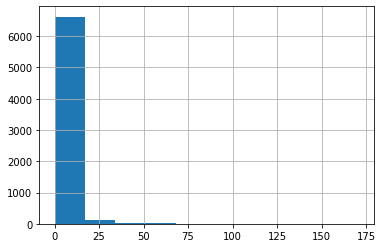

In [154]:
data.loc[data['Post-op Length of Stay'] == 'nan', 'Post-op Length of Stay'] = np.NaN
data.loc[data['Post-op Length of Stay'] == '0.0', 'Post-op Length of Stay'] = np.NaN
data['Post-op Length of Stay'].astype(float)
data['Post-op Length of Stay'].hist()

In [155]:
data.loc[data['Medicaid Expansion'] == '0', 'Medicaid Expansion'] = 'Non-Expansion State'
data.loc[data['Medicaid Expansion'] == '1', 'Medicaid Expansion'] = 'Early Expansion (before 1/2014)'
data.loc[data['Medicaid Expansion'] == '2', 'Medicaid Expansion'] = 'Early Expansion (before 1/2014)'
data.loc[data['Medicaid Expansion'] == '3', 'Medicaid Expansion'] = 'Late Expansion States (after 1/2014)'
data.loc[data['Medicaid Expansion'] == '9', 'Medicaid Expansion'] = 'Suppressed for Ages 0-39'

data.loc[data['Medicaid Expansion'] == 'nan', 'Medicaid Expansion'] = np.NaN
data.loc[data['Medicaid Expansion'] == 'None assigned', 'Medicaid Expansion'] = np.NaN
data['Medicaid Expansion'].fillna('Unknown', inplace=True)
data.loc[data['Medicaid Expansion'] == "Unknown", 'Medicaid Expansion'] = np.NaN
data['Medicaid Expansion'].value_counts(dropna=False)

Early Expansion (before 1/2014)         16488
Non-Expansion State                     11938
Late Expansion States (after 1/2014)     4413
Suppressed for Ages 0-39                  984
Name: Medicaid Expansion, dtype: int64

In [156]:
data.loc[data['Post-op Readmission'] == '0', 'Post-op Readmission'] = 'No surgery/readmission'
data.loc[data['Post-op Readmission'] == '1', 'Post-op Readmission'] = 'Readmission'
data.loc[data['Post-op Readmission'] == '2', 'Post-op Readmission'] = 'Readmission'
data.loc[data['Post-op Readmission'] == '3', 'Post-op Readmission'] = 'Readmission'
data.loc[data['Post-op Readmission'] == '9', 'Post-op Readmission'] = np.NaN

data.loc[data['Post-op Readmission'] == 'nan', 'Post-op Readmission'] = np.NaN
data.loc[data['Post-op Readmission'] == 'None assigned', 'Post-op Readmission'] = np.NaN
data['Post-op Readmission'].fillna('Unknown', inplace=True)
data.loc[data['Post-op Readmission'] == "Unknown", 'Post-op Readmission'] = np.NaN
data['Post-op Readmission'].value_counts(dropna=False)

No surgery/readmission    32663
NaN                         593
Readmission                 567
Name: Post-op Readmission, dtype: int64

In [157]:
data.loc[data['Reason for No Surgery'] == '0', 'Reason for No Surgery'] = 'N/A'
data.loc[data['Reason for No Surgery'] == '1', 'Reason for No Surgery'] = 'N/A'
data.loc[data['Reason for No Surgery'] == '2', 'Reason for No Surgery'] = 'Contra-indicated'
data.loc[data['Reason for No Surgery'] == '5', 'Reason for No Surgery'] = 'Patient died'
data.loc[data['Reason for No Surgery'] == '6', 'Reason for No Surgery'] = 'Unknown reason'
data.loc[data['Reason for No Surgery'] == '7', 'Reason for No Surgery'] = 'Refused'
data.loc[data['Reason for No Surgery'] == '8', 'Reason for No Surgery'] = 'Unknown reason'

data.loc[data['Reason for No Surgery'] == '9', 'Reason for No Surgery'] = np.NaN

data.loc[data['Reason for No Surgery'] == 'nan', 'Reason for No Surgery'] = np.NaN
data.loc[data['Reason for No Surgery'] == 'None assigned', 'Reason for No Surgery'] = np.NaN
data['Reason for No Surgery'].fillna('Unknown', inplace=True)
data.loc[data['Reason for No Surgery'] == "Unknown", 'Reason for No Surgery'] = np.NaN
data['Reason for No Surgery'].value_counts(dropna=False)

N/A                 32487
Unknown reason        423
Contra-indicated      392
NaN                   315
Refused               173
Patient died           33
Name: Reason for No Surgery, dtype: int64

In [158]:
data = data.loc[data['Reason for No Surgery'] != 'Patient died']

In [159]:
data['Pathologic Stage'].value_counts()

No surgery    23526
nan            7110
0              3136
2                 9
3                 5
1                 2
4                 2
Name: Pathologic Stage, dtype: int64

In [160]:
data['APR performed'].value_counts()

0.0        23526
missing     9415
1.0          849
Name: APR performed, dtype: int64

In [161]:
data.loc[data['APR performed'] == '0.0', 'Pathologic Stage'] = 'No surgery'
data.loc[data['APR performed'] != '1.0', 'Pathologic Stage'] = 'No surgery'
data['Pathologic Stage'].value_counts(dropna=False)

No surgery    32941
nan             629
0               216
2                 3
3                 1
Name: Pathologic Stage, dtype: int64

In [162]:
data.loc[data['Pathologic Stage'].str.contains('1'), 'Pathologic Stage'] = '1'
data.loc[data['Pathologic Stage'].str.contains('2'), 'Pathologic Stage'] = '2'
data.loc[data['Pathologic Stage'].str.contains('3'), 'Pathologic Stage'] = '3'
data.loc[data['Pathologic Stage'].str.contains('4'), 'Pathologic Stage'] = '4'
data.loc[data['Pathologic Stage'] == '0.0', 'Pathologic Stage'] = '0'
data.loc[data['Pathologic Stage'] == 'nan', 'Pathologic Stage'] = np.NaN
data['Pathologic Stage'].value_counts()

No surgery    32941
0               216
2                 3
3                 1
Name: Pathologic Stage, dtype: int64

In [163]:
for x in num_cols:
    try:
        data.loc[data[x] == 'nan', x] = np.NaN
    except:
        pass

In [164]:
data.head()

,Facility Type,Facility Location,Age,Sex,Race,Hispanic Ethnicity,Insurance Status,Urban/Rural,Distance from Hospital,Charlson-Deyo Score,Year of Diagnosis,Grade,Tumor Size,Lymphovascular Invasion,Surgical Margins,Post-op Length of Stay,Post-op Readmission,Reason for No Surgery,"Treatment Started, Days from Dx",Chemotherapy,"No High School Degree, Quartile","Income, Quartile",Medicaid Expansion,Total Dose,APR performed,Stage,T Stage,N Stage,M Stage,Pathologic Stage,Facility Volume Quartile,3-yr Mortality,Keratinizing,Basaloid,Cloacogenic
PUF_CASE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D66f458f9-bdc0-4c95-94a3-a5f8c5bb74f9,Academic/Research Program,Midwest,52.0,Female,White,Non-Hispanic,Not Insured,Urban,3.6,0,2016,"Grade II, Moderately differentiated",38.0,No,No Surgery,NaN,No surgery/readmission,N/A,86.0,Multi-agent,>=21.0%,"< $30,000",Non-Expansion State,0.0,0.0,2A,2.0,0.0,0,No surgery,3.0,0.0,Not Keratinizing,Not Basaloid,Not Cloacogenic
Dfc68ea23-71aa-4b0d-87c0-587b4ce13d04,Academic/Research Program,West,49.0,Female,White,Non-Hispanic,Private Insurance or Managed Care,Urban,11.4,0,2004,"Grade II, Moderately differentiated",44.0,NaN,No Surgery,NaN,No surgery/readmission,N/A,20.0,Multi-agent,7.0-12.9%,"$35,000 - $45,999",Early Expansion (before 1/2014),NaN,0.0,3A,2.0,1.0,0,No surgery,1.0,0.0,Not Keratinizing,Basaloid,Not Cloacogenic
D54a1d0da-4328-4ca5-8481-87cd73b33dd4,Academic/Research Program,Midwest,58.0,Male,White,Non-Hispanic,Medicaid,Urban,14.0,0,2014,"Grade II, Moderately differentiated",86.0,No,No Surgery,0.0,No surgery/readmission,N/A,35.0,Multi-agent,<7.0%,">=$46,000",Early Expansion (before 1/2014),5940.0,missing,2B,3.0,0.0,0,No surgery,3.0,0.0,Not Keratinizing,Not Basaloid,Not Cloacogenic
D62170955-5fc5-434e-8e6a-6a9e139851c4,Academic/Research Program,Midwest,80.0,Female,White,Non-Hispanic,Medicare/Public,Urban,NaN,0,2017,"Grade III, Poorly differentiated",25.0,NaN,No Surgery,NaN,No surgery/readmission,N/A,34.0,Multi-agent,NaN,NaN,Early Expansion (before 1/2014),5220.0,missing,1,1.0,0.0,0,No surgery,3.0,0.0,Not Keratinizing,Not Basaloid,Not Cloacogenic
Dbfa7903c-bd06-4e1c-9d22-a3d39ed96aee,Integrated Network Cancer Program,Midwest,42.0,Female,White,Non-Hispanic,Private Insurance or Managed Care,Urban,12.7,0,2014,"Grade III, Poorly differentiated",20.0,No,No Surgery,0.0,No surgery/readmission,N/A,45.0,Multi-agent,<7.0%,">=$46,000",Early Expansion (before 1/2014),NaN,missing,1,1.0,0.0,0,No surgery,4.0,0.0,Not Keratinizing,Not Basaloid,Not Cloacogenic


In [165]:
data.loc[data['APR performed'] != '1.0', 'APR performed'] = '0.0'

In [166]:
num_cols.remove('Surgery, Days from Dx')

In [167]:
for x in num_cols:
    data.loc[data[x] == 'Unknown', x] = np.NaN

In [168]:
for x in data.columns.to_list():
    data.loc[data[x] == 'Unknown', x] = np.NaN
    data.loc[data[x] == 'nan', x] = np.NaN

In [169]:
cols = data.columns.to_list()
cat_cols = [x for x in cols if x not in num_cols]

In [170]:
data['Year of Diagnosis'] = data['Year of Diagnosis'].astype(int)

In [171]:
data.to_csv('data/data_os_clean.csv', index_label='PUF_CASE_ID')

In [172]:
#define a function that returns value counts and value percentages for a given column
def table(df, col):
    return pd.concat([df[col].value_counts(), df[col].value_counts(normalize=True)], axis=1, keys=('counts', 'percent'))
def by_year(df, col):
    return pd.crosstab(df['YEAR_OF_DIAGNOSIS'], df[col], margins=True, dropna=False)

In [173]:
table(data, 'Year of Diagnosis')

,counts,percent
2016,3177,0.094022
2014,3054,0.090382
2015,2975,0.088044
2013,2899,0.085795
2012,2634,0.077952
2011,2458,0.072743
2017,2405,0.071175
2009,2307,0.068275
2010,2276,0.067357
2008,2145,0.063480


In [174]:
table(data, 'APR performed')

,counts,percent
0.0,32941,0.974874
1.0,849,0.025126


In [175]:
table(data, '3-yr Mortality')

,counts,percent
0.0,25802,0.763599
1.0,7988,0.236401


In [176]:
data['3-yr Mortality'].value_counts(dropna=False)

0.0    25802
1.0     7988
Name: 3-yr Mortality, dtype: int64

In [177]:
tableone = TableOne(data, categorical=cat_cols, groupby='3-yr Mortality', pval=True)


/home/kchen/.local/lib/python3.8/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),
/home/kchen/.local/lib/python3.8/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


In [ ]:
tableone.to_excel('results/table1_os_raw.xlsx')